# Import Library

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import joblib
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
%matplotlib inline

#Data Acquisition

In [2]:
df = pd.read_excel("DatasetPA.xlsx")
df

,Timestamp,Nilai Matematika,Jurusan saat Sekolah,Minat1,Minat2,Karir1,Karir2,Program Studi saat ini
0,2022-11-23 09:02:15.983,88.0,RPL,Mobile Developer,Designer Graphics,Mobile Apps Developer,UI / UX Designer,Teknik Informatika
1,2022-11-23 09:03:04.933,97.0,RPL,Mobile Developer,Data,Mobile Apps Developer,Data Scientist / Data Analyst / Data Engineer,Teknik Informatika
2,2022-11-23 09:03:26.171,88.0,RPL,Mobile Developer,Artificial Intelligence,Mobile Apps Developer,Machine Learning Engineer,Teknik Informatika
3,2022-11-23 09:04:07.155,96.0,IPA,Mobile Developer,Designer Graphics,Mobile Apps Developer,NaN,Teknik Informatika
4,2022-11-23 09:04:28.837,88.0,IPA,Mobile Developer,Data,Mobile Apps Developer,NaN,Teknik Informatika
...,...,...,...,...,...,...,...,...
247,2022-11-22 23:23:24.182,77.0,IPS,Cyber Security,Smart Devices / Arduino,Auditor TI,NaN,Teknologi Informasi
248,2022-11-22 23:23:51.919,89.0,TKJ,Cyber Security,NaN,Auditor TI,NaN,Teknologi Informasi
249,2022-11-22 23:24:12.757,92.0,IPA,Cyber Security,Smart Devices / Arduino,Auditor TI,IoT Engineer,Teknologi Informasi
250,2022-11-22 23:24:32.139,85.0,TKJ,Cyber Security,Smart Devices / Arduino,Auditor TI,IoT Engineer,Teknologi Informasi


# Exploratory data analysis (EDA)

In [3]:
df = df.drop(['Timestamp'],axis='columns')
df

,Nilai Matematika,Jurusan saat Sekolah,Minat1,Minat2,Karir1,Karir2,Program Studi saat ini
0,88.0,RPL,Mobile Developer,Designer Graphics,Mobile Apps Developer,UI / UX Designer,Teknik Informatika
1,97.0,RPL,Mobile Developer,Data,Mobile Apps Developer,Data Scientist / Data Analyst / Data Engineer,Teknik Informatika
2,88.0,RPL,Mobile Developer,Artificial Intelligence,Mobile Apps Developer,Machine Learning Engineer,Teknik Informatika
3,96.0,IPA,Mobile Developer,Designer Graphics,Mobile Apps Developer,NaN,Teknik Informatika
4,88.0,IPA,Mobile Developer,Data,Mobile Apps Developer,NaN,Teknik Informatika
...,...,...,...,...,...,...,...
247,77.0,IPS,Cyber Security,Smart Devices / Arduino,Auditor TI,NaN,Teknologi Informasi
248,89.0,TKJ,Cyber Security,NaN,Auditor TI,NaN,Teknologi Informasi
249,92.0,IPA,Cyber Security,Smart Devices / Arduino,Auditor TI,IoT Engineer,Teknologi Informasi
250,85.0,TKJ,Cyber Security,Smart Devices / Arduino,Auditor TI,IoT Engineer,Teknologi Informasi


Text(10.049999999999997, 0.5, 'Jumlah')

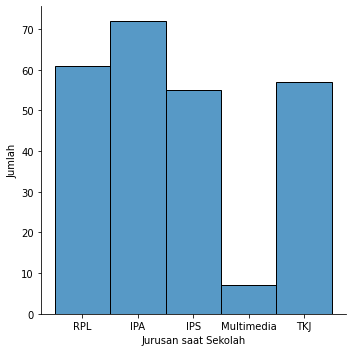

In [45]:
sns.displot(df['Jurusan saat Sekolah'])
plt.ylabel('Jumlah')

Text(10.049999999999997, 0.5, 'Jumlah')

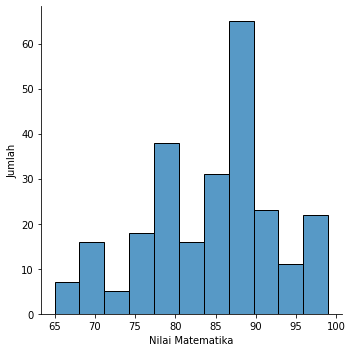

In [46]:
sns.displot(df['Nilai Matematika'])
plt.ylabel('Jumlah')

In [47]:
print('Dataset Information: \n')
print(df.info())

Dataset Information: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Nilai Matematika        252 non-null    float64
 1   Jurusan saat Sekolah    252 non-null    object 
 2   Minat1                  252 non-null    object 
 3   Minat2                  172 non-null    object 
 4   Karir1                  251 non-null    object 
 5   Karir2                  154 non-null    object 
 6   Program Studi saat ini  252 non-null    object 
dtypes: float64(1), object(6)
memory usage: 13.9+ KB
None


In [ ]:
print(df.isnull().sum().sort_values(ascending=False))

Karir2                    98
Minat2                    80
Karir1                     1
Nilai Matematika           0
Jurusan saat Sekolah       0
Minat1                     0
Program Studi saat ini     0
dtype: int64


In [ ]:
df.replace(to_replace='IPA', value=1, inplace = True)
df.replace(to_replace='TKJ', value=2, inplace = True)
df.replace(to_replace='IPS', value=3, inplace = True)
df.replace(to_replace='Multimedia', value=4, inplace = True)
df.replace(to_replace='RPL', value=5, inplace = True)

In [ ]:
df.replace(to_replace='Teknik Informatika', value=1, inplace = True)
df.replace(to_replace='Manajemen Informatika', value=2, inplace = True)
df.replace(to_replace='Sistem Informasi', value=3, inplace = True)
df.replace(to_replace='Teknik Komputer', value=4, inplace = True)
df.replace(to_replace='Teknologi Informasi', value=5, inplace = True)

In [ ]:
minat = {np.nan: 0, 'Mobile Developer': 1, 'Data': 2, 'Artificial Intelligence': 3, 'Designer Graphics': 4, 'Cyber Security (Hacking)': 5, 'Networking': 6, 'Operating System': 7,
         'Database': 8, 'Web Development': 9, 'Smart Devices / Arduino': 10, 'Cyber Security': 11, 'Creating Game': 12}

In [ ]:
df.Minat1 = [minat[item] for item in df.Minat1]

In [ ]:
df.Minat2 = [minat[item] for item in df.Minat2]

In [ ]:
karir = {np.nan:0, 'Mobile Apps Developer': 1, 'UI / UX Designer': 2, 'Data Scientist / Data Analyst / Data Engineer': 3, 'Machine Learning Engineer': 4, 'DevOps Engineer': 5, 'Attacker / Defense Cyber Security': 6, 'System Administrator / Network Administrator': 7,
         'Database Administrator': 8, 'Software Engineer': 9, 'IoT Engineer': 10, 'Auditor TI': 11, 'Web Developer': 12, 'Game Developer': 13}

In [ ]:
df.Karir1 = [karir[item] for item in df.Karir1]

In [ ]:
df.Karir2 = [karir[item] for item in df.Karir2]

In [ ]:
df

,Nilai Matematika,Jurusan saat Sekolah,Minat1,Minat2,Karir1,Karir2,Program Studi saat ini
0,88.0,5,1,4,1,2,1
1,97.0,5,1,2,1,3,1
2,88.0,5,1,3,1,4,1
3,96.0,1,1,4,1,0,1
4,88.0,1,1,2,1,0,1
...,...,...,...,...,...,...,...
247,77.0,3,11,10,11,0,5
248,89.0,2,11,0,11,0,5
249,92.0,1,11,10,11,10,5
250,85.0,2,11,10,11,10,5


#Modelling & Evaluation

In [ ]:
X = df.drop(['Program Studi saat ini'], axis = 1)
X

,Nilai Matematika,Jurusan saat Sekolah,Minat1,Minat2,Karir1,Karir2
0,88.0,5,1,4,1,2
1,97.0,5,1,2,1,3
2,88.0,5,1,3,1,4
3,96.0,1,1,4,1,0
4,88.0,1,1,2,1,0
...,...,...,...,...,...,...
247,77.0,3,11,10,11,0
248,89.0,2,11,0,11,0
249,92.0,1,11,10,11,10
250,85.0,2,11,10,11,10


In [ ]:
y = df['Program Studi saat ini']
y

0      1
1      1
2      1
3      1
4      1
      ..
247    5
248    5
249    5
250    5
251    5
Name: Program Studi saat ini, Length: 252, dtype: int64

In [ ]:
y=y.astype('int')

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

##GridSearchCV

##Decision Tree

In [ ]:
model_dt = DecisionTreeClassifier()
parameters_dt = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [3, 5, 7, 11],
}
gs_dt = GridSearchCV(model_dt, parameters_dt)

gs_dt.fit(X_train, y_train)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 7, 11]})

In [ ]:
print(gs_dt.best_params_)

{'criterion': 'gini', 'max_depth': 5}


In [ ]:
dt_model = DecisionTreeClassifier(criterion='gini', max_depth=5)

In [ ]:
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5)

In [ ]:
y_pred_dt = dt_model.predict(X_test)
dt_score = accuracy_score(y_pred_dt, y_test)
print('Test-set accuracy DT: ', dt_score)

Test-set accuracy DT:  1.0


In [ ]:
cm_rf = confusion_matrix(y_test, y_pred_dt)
cm_rf

array([[12,  0,  0,  0,  0],
       [ 0,  9,  0,  0,  0],
       [ 0,  0, 12,  0,  0],
       [ 0,  0,  0, 11,  0],
       [ 0,  0,  0,  0,  7]])

In [ ]:
print(dt_model.predict([[1, 85, 1, 3, 4, 0]]))
print(dt_model.predict([[2, 93, 9, 0, 12, 13]]))
print(dt_model.predict([[4, 88, 8, 9, 9, 0]]))
print(dt_model.predict([[3, 95, 6, 7, 5, 0]]))
print(dt_model.predict([[1, 89, 10, 0, 10, 11]]))

[1]
[2]
[3]
[4]
[5]


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with

##SVC

In [ ]:
model_svc = SVC()
parameters_svc = {
    'C': [0.1, 1, 10, 100, 1000],
    'gamma': [1, 0,5, 0.1, 0.01, 0.001, 0.0001],
    'kernel': ['rbf']
}
gs_svc = GridSearchCV(model_svc, parameters_svc)

gs_svc.fit(X_train, y_train)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0, 5, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']})

In [ ]:
print(gs_svc.best_params_)

{'C': 1000, 'gamma': 0.001, 'kernel': 'rbf'}


In [ ]:
svc_model = SVC(C=1000, gamma=0.001, kernel='rbf')

In [ ]:
svc_model.fit(X_train, y_train)

SVC(C=1000, gamma=0.001)

In [ ]:
y_pred_svc = svc_model.predict(X_test)
svc_score = accuracy_score(y_pred_svc, y_test)
print('Test-set accuracy SVC: ', svc_score)

Test-set accuracy SVC:  0.9803921568627451


In [ ]:
cm_rf = confusion_matrix(y_test, y_pred_svc)
cm_rf

array([[12,  0,  0,  0,  0],
       [ 0,  8,  0,  0,  1],
       [ 0,  0, 12,  0,  0],
       [ 0,  0,  0, 11,  0],
       [ 0,  0,  0,  0,  7]])

In [ ]:
print(svc_model.predict([[1, 85, 1, 3, 4, 0]]))
print(svc_model.predict([[2, 93, 9, 0, 12, 13]]))
print(svc_model.predict([[4, 88, 8, 9, 9, 0]]))
print(svc_model.predict([[3, 95, 6, 7, 5, 0]]))
print(svc_model.predict([[1, 89, 10, 0, 10, 11]]))

[2]
[2]
[2]
[2]
[2]


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  "X does not have valid feature names, but"


##Random Forest

In [ ]:
model_rf = RandomForestClassifier(random_state=42)
parameters_rf = { 
    'n_estimators': [30, 50, 100, 150, 200],
    'max_features': ['auto', 'sqrt'],
    'max_depth' : [3, 4, 5, 6, 7, 8, 9, 10, 11],
    'criterion' :['gini', 'entropy']
}

gs_rf = GridSearchCV(model_rf, parameters_rf)

gs_rf.fit(X_train, y_train)

GridSearchCV(estimator=RandomForestClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 4, 5, 6, 7, 8, 9, 10, 11],
                         'max_features': ['auto', 'sqrt'],
                         'n_estimators': [30, 50, 100, 150, 200]})

In [ ]:
print(gs_rf.best_params_)

{'criterion': 'gini', 'max_depth': 3, 'max_features': 'auto', 'n_estimators': 30}


In [ ]:
rf_model=RandomForestClassifier(random_state=42,
                                max_features='auto',
                                n_estimators= 30,
                                max_depth=3,
                                criterion='gini')

In [ ]:
rf_model.fit(X_train, y_train)

RandomForestClassifier(max_depth=3, n_estimators=30, random_state=42)

In [ ]:
y_pred_rf = rf_model.predict(X_test)
rf_score = accuracy_score(y_pred_rf, y_test)
print('Test-set accuracy RF: ', rf_score)

Test-set accuracy RF:  1.0


In [ ]:
cm_rf = confusion_matrix(y_test, y_pred_rf)
cm_rf

array([[12,  0,  0,  0,  0],
       [ 0,  9,  0,  0,  0],
       [ 0,  0, 12,  0,  0],
       [ 0,  0,  0, 11,  0],
       [ 0,  0,  0,  0,  7]])

In [ ]:
print(rf_model.predict([[1, 85, 1, 3, 4, 0]]))
print(rf_model.predict([[2, 93, 9, 0, 12, 13]]))
print(rf_model.predict([[4, 88, 8, 9, 9, 0]]))
print(rf_model.predict([[3, 95, 6, 7, 5, 0]]))
print(rf_model.predict([[1, 89, 10, 0, 10, 11]]))

[1]
[2]
[3]
[4]
[5]


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with

##Export Model

In [ ]:
joblib.dump((dt_model), "dt_model.model")

['dt_model.model']